In [1]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
Th_GABA1 <- readRDS('/data/work/5month_Th/GABA/10_Th_GABA_unannotation.rds')
Th_GABA1

An object of class Seurat 
18448 features across 4147 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
Th_GABA2 <- readRDS('/data/work/5month_Th/Th_GABA_subset.rds')
Th_GABA2

An object of class Seurat 
18448 features across 2361 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
# Merge the two objects
Th_GABA <- merge(Th_GABA1, y = Th_GABA2)

In [7]:
Th_GABA@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,Sample_ID,Run_ID,Animal,Sex,Region_1,Region_2,Region_LR,⋯,Glu_integrated_snn_res.2.5,Glu_integrated_snn_res.3,Glu_integrated_snn_res.3.5,Glu_integrated_snn_res.4,Glu_integrated_snn_res.4.5,Glu_integrated_snn_res.5,Glu_integrated_snn_res.5.5,Glu_integrated_snn_res.6,Glu_level_cluster,Glu_level_subcelltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CELL3_N1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,927,486,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL18_N1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,1921,1055,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL22_N1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,820,511,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL28_N1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,964,566,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL32_N4_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,5474,2318,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL40_N1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,2622,1329,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL45_N2_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,2964,1445,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL54_N3_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,4188,1822,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CELL56_N3_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,B10T_2031-1-230313,5142,2208,B10T,2031-1-230313,B10,Male,Thalamus,NotApp,NotApp,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
# Identify columns with 'Glu' prefix in meta.data
glu_columns <- grep("^Glu", colnames(Th_GABA@meta.data), value = TRUE)

# Remove the identified columns from meta.data
Th_GABA@meta.data <- Th_GABA@meta.data[, !colnames(Th_GABA@meta.data) %in% glu_columns]

# Check if the columns have been removed
print(colnames(Th_GABA@meta.data))

  [1] "orig.ident"                        "nCount_RNA"                       
  [3] "nFeature_RNA"                      "Sample_ID"                        
  [5] "Run_ID"                            "Animal"                           
  [7] "Sex"                               "Region_1"                         
  [9] "Region_2"                          "Region_LR"                        
 [11] "Platform"                          "Age"                              
 [13] "sample_id"                         "percent.mito"                     
 [15] "percent.ribo"                      "RNA_snn_res.0.8"                  
 [17] "seurat_clusters"                   "pANN_0.25_0.12_283"               
 [19] "DF.classifications_0.25_0.12_283"  "doubFind_res"                     
 [21] "doubFind_score"                    "pANN_0.25_0.06_271"               
 [23] "DF.classifications_0.25_0.06_271"  "pANN_0.25_0.005_477"              
 [25] "DF.classifications_0.25_0.005_477" "pANN_0.25_0.005_413" 

In [9]:
Idents(Th_GABA) <- Th_GABA$`Sample_ID`

In [10]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(Th_GABA, split.by = "Sample_ID")

# NormalizeData
for (name in names(budgerigar_brain_obj_list)) {

    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”


In [11]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [12]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")

Th_GABA <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 436 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 277 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data

In [13]:
# Scale data (default: only for variable features)
variable_feature <- rownames(Th_GABA)

In [14]:
Th_GABA <- ScaleData(Th_GABA, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [15]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(Th_GABA) <- "integrated"

# PCA

Th_GABA <- RunPCA(Th_GABA, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  ADGRB3, ENSMUNG00000009092, GRIA3, GRIK2, GALNTL6, CDH11, CHL1, ENSMUNG00000015636, EPHA5, TENM3 
	   GALNT7, ENSMUNG00000006113, LRP1B, ENSMUNG00000010509, CTNND2, CDH10, BRINP3, TAFA5, ENSMUNG00000004441, NKAIN2 
	   PTPRD, CYFIP1, ISL1, ENSMUNG00000003450, GRID1, DOK7, MAMDC2, ENSMUNG00000007673, TRPC4, ENSMUNG00000002688 
Negative:  CEMIP, ENSMUNG00000013449, SVEP1, ENSMUNG00000003056, FAM184B, LUZP2, CXCL14, TRAIP, PLXND1, ENSMUNG00000007222 
	   ENSMUNG00000002161, SEMA3E, ZEB1, COL14A1, SARDH, RELN, MOXD1, ENSMUNG00000004301, TRPM1, FSTL5 
	   LAPTM4B, SLC24A2, OTOG, HECTD2, GAD2, SLITRK4, CACNA1G, ENSMUNG00000004039, ATP1B1, NR2F2 
PC_ 2 
Positive:  ATP1B1, COX3, COX1, ND5, ENSMUNG00000004039, HPCAL1, PVALB, ND6, NEFL, SLIT1 
	   ENSMUNG00000000005, ENSMUNG00000006196, ENSMUNG00000008602, SNCG, SLC17A6, TCF7L2, ENSMUNG00000002397, PSPH, ENSMUNG00000001939, WFS1 
	   FEN1, COX20, SLC31A1, NRN1, NTS, NELL2, FBLN5, DOCK5, RAB3B, TMEM129 
Negative:  CEMIP, SVEP1, 

In [16]:
Th_GABA <- FindNeighbors(Th_GABA, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:59:30 UMAP embedding parameters a = 0.9922 b = 1.112

17:59:30 Read 6508 rows and found 40 numeric columns

17:59:30 Using Annoy for neighbor search, n_neighbors = 30

17:59:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:59:31 Writing NN index file to temp file /tmp/RtmpLs66rh/file36d11004210

17:59:31 Searching Annoy index using 1 thread, search_k =

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8663
Number of communities: 14
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8173
Number of communities: 18
Elapsed time: 1 seconds


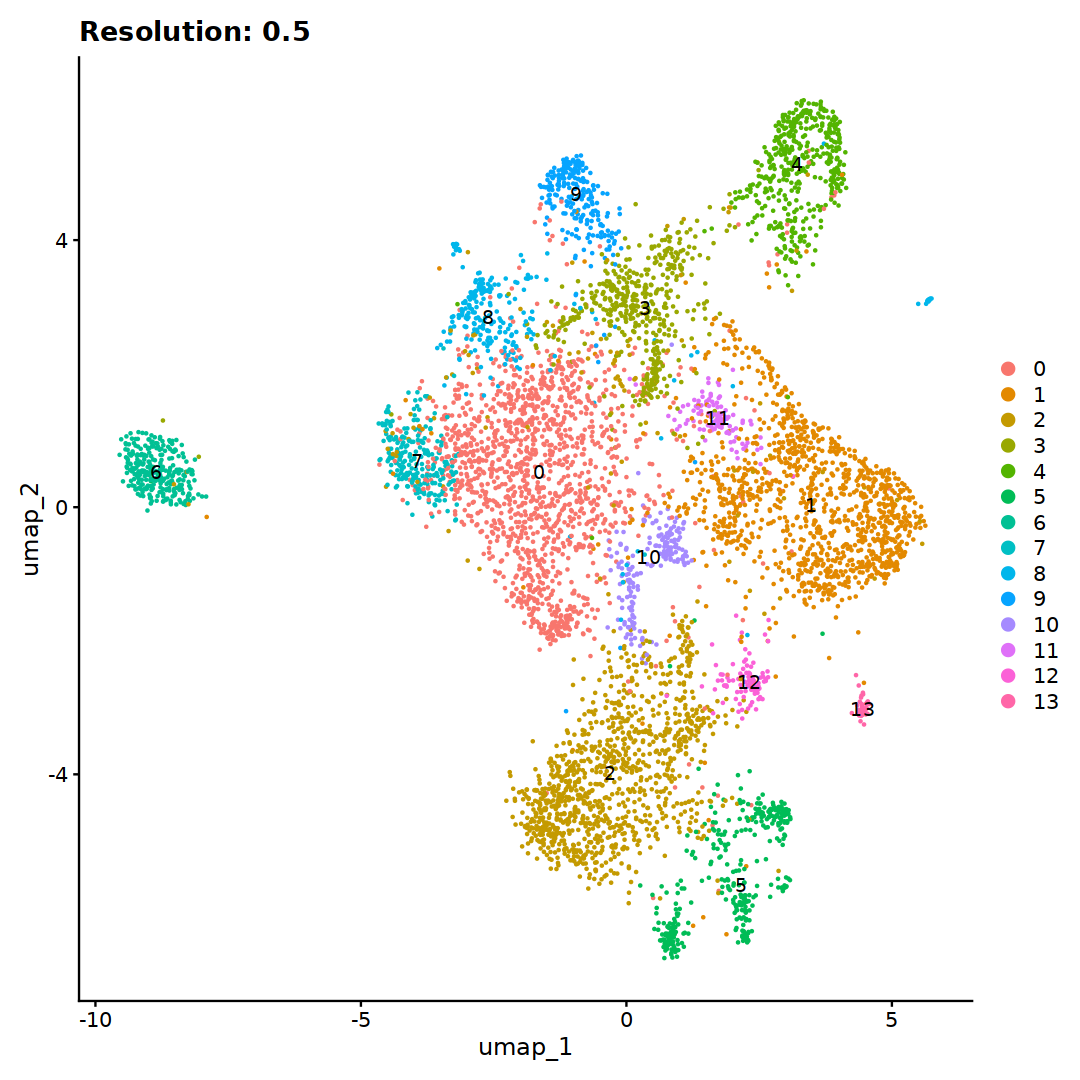

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7772
Number of communities: 20
Elapsed time: 1 seconds


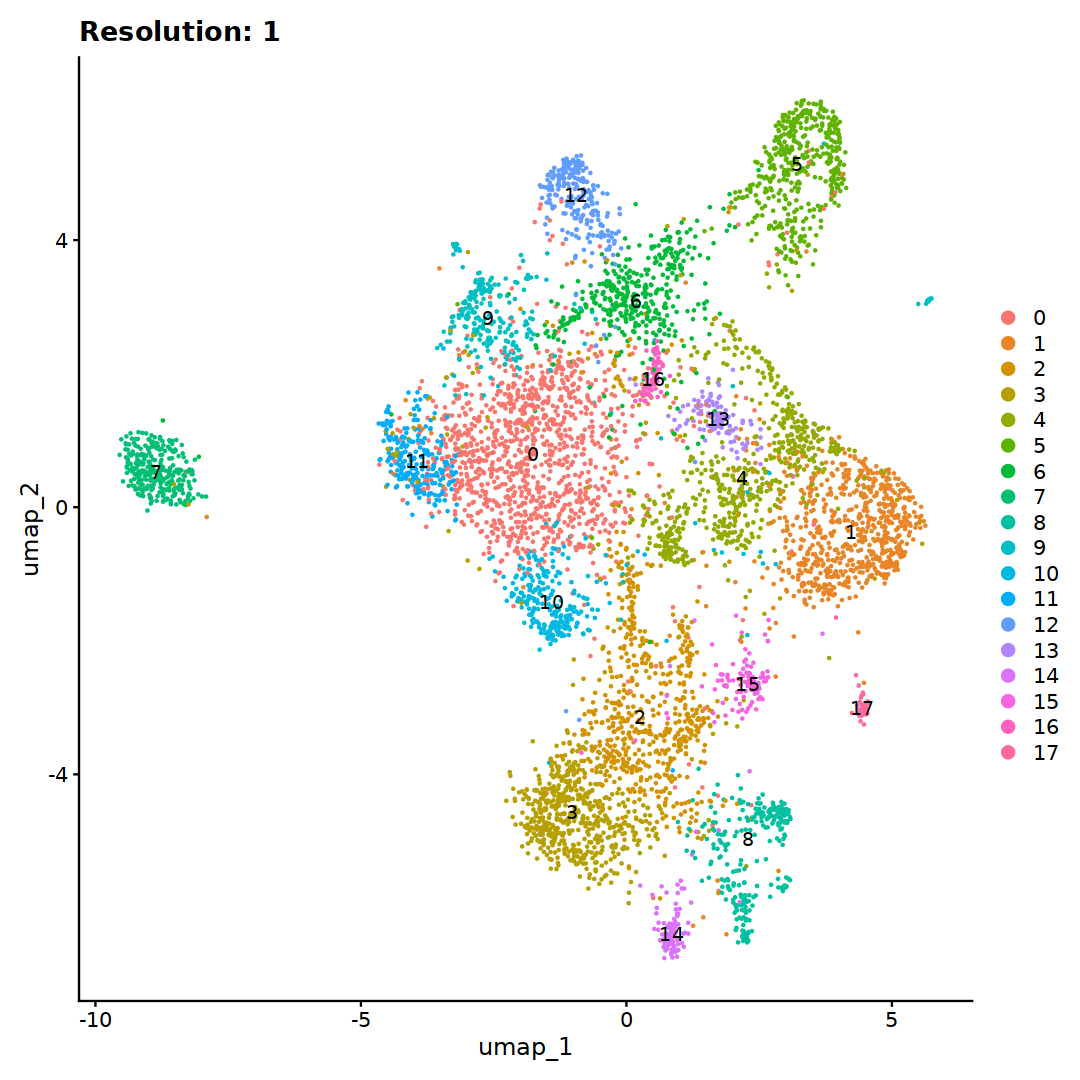

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7387
Number of communities: 22
Elapsed time: 1 seconds


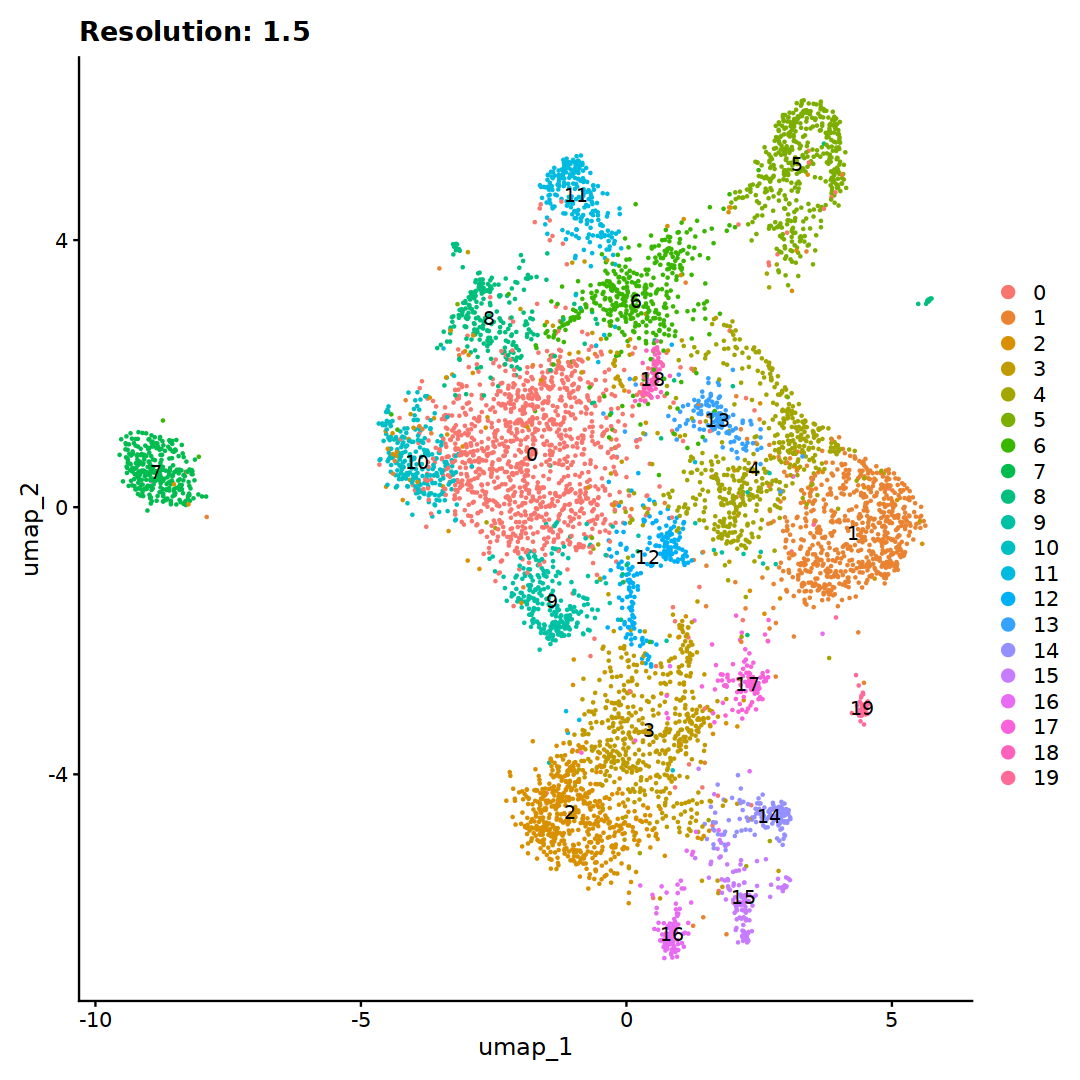

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7034
Number of communities: 26
Elapsed time: 1 seconds


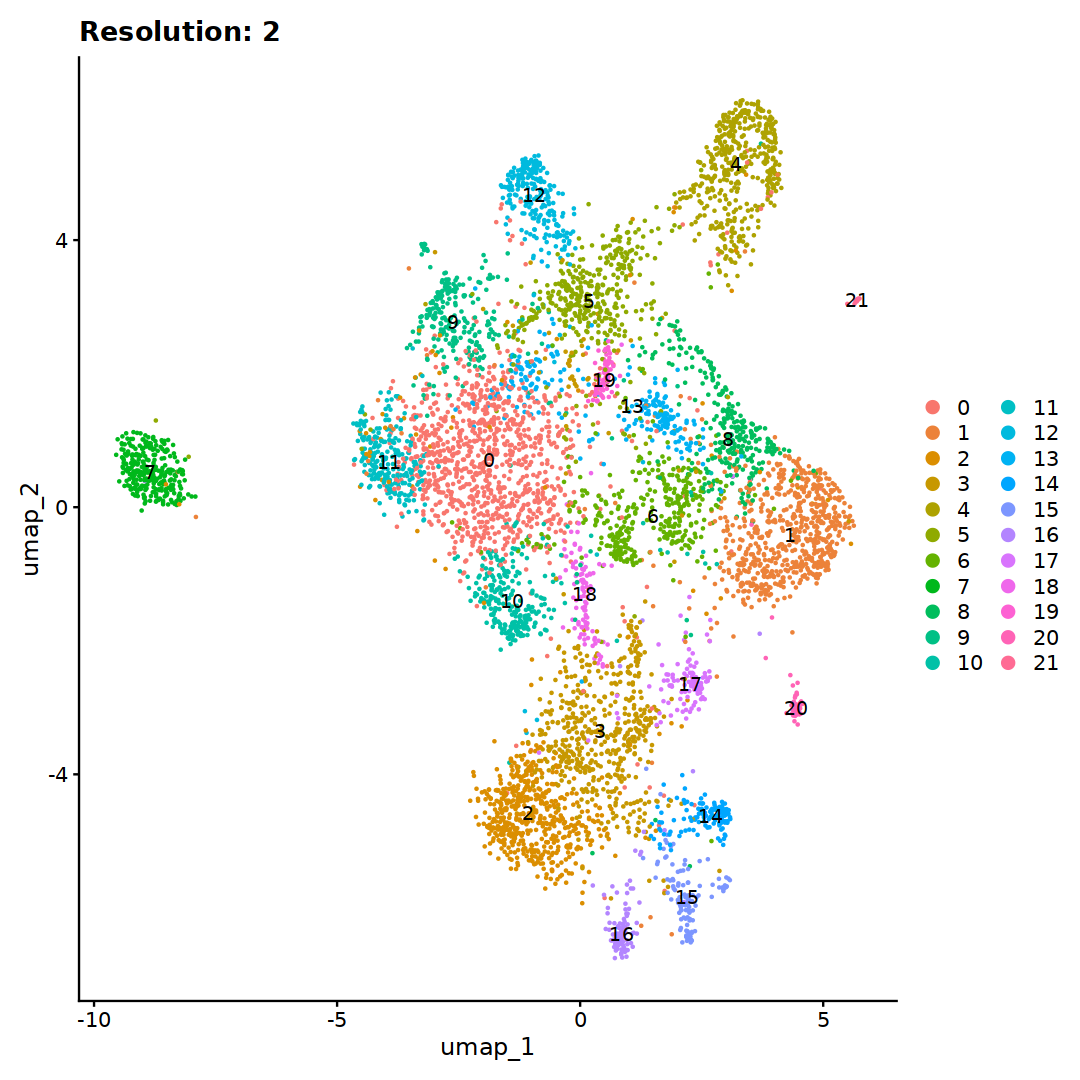

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6728
Number of communities: 29
Elapsed time: 1 seconds


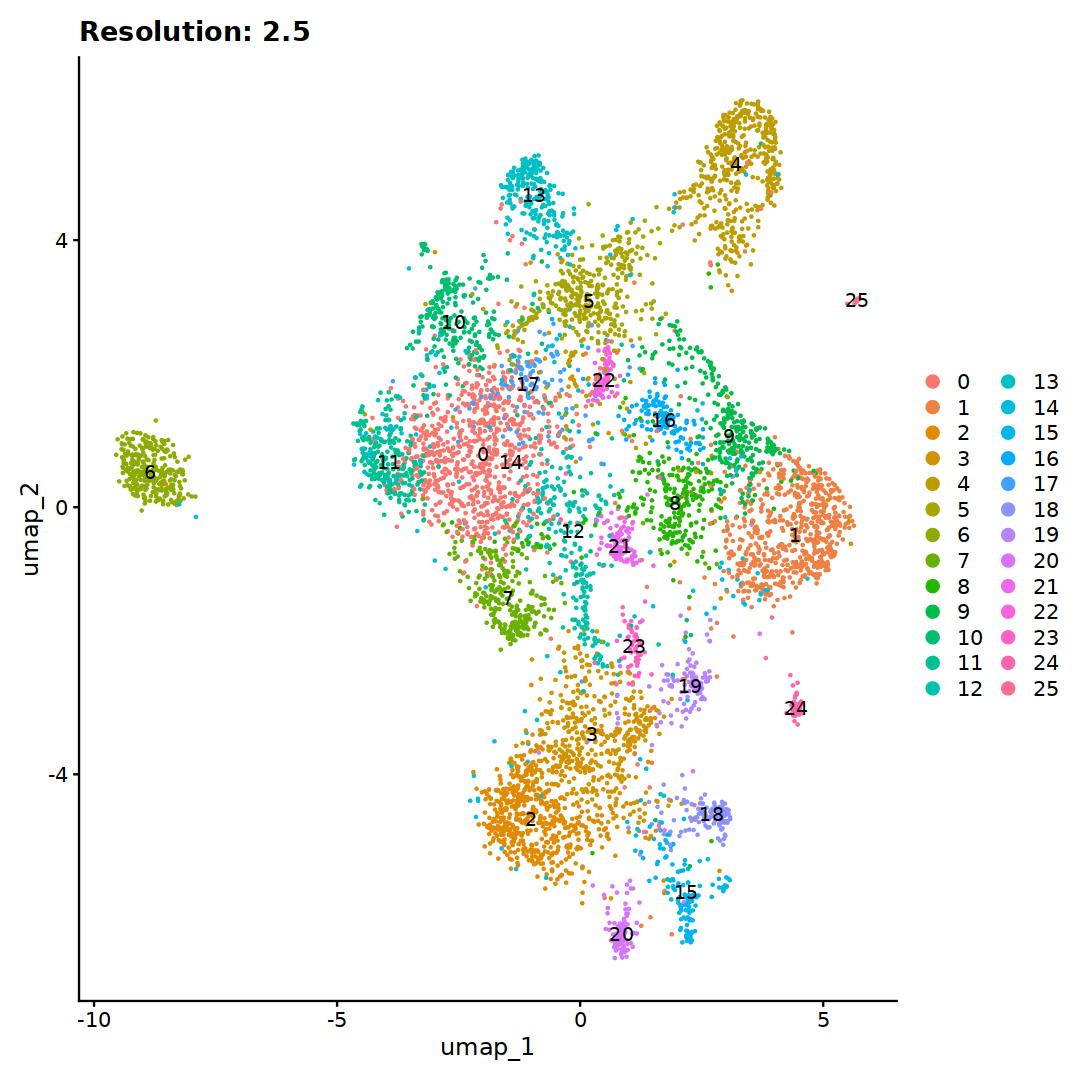

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6481
Number of communities: 33
Elapsed time: 1 seconds


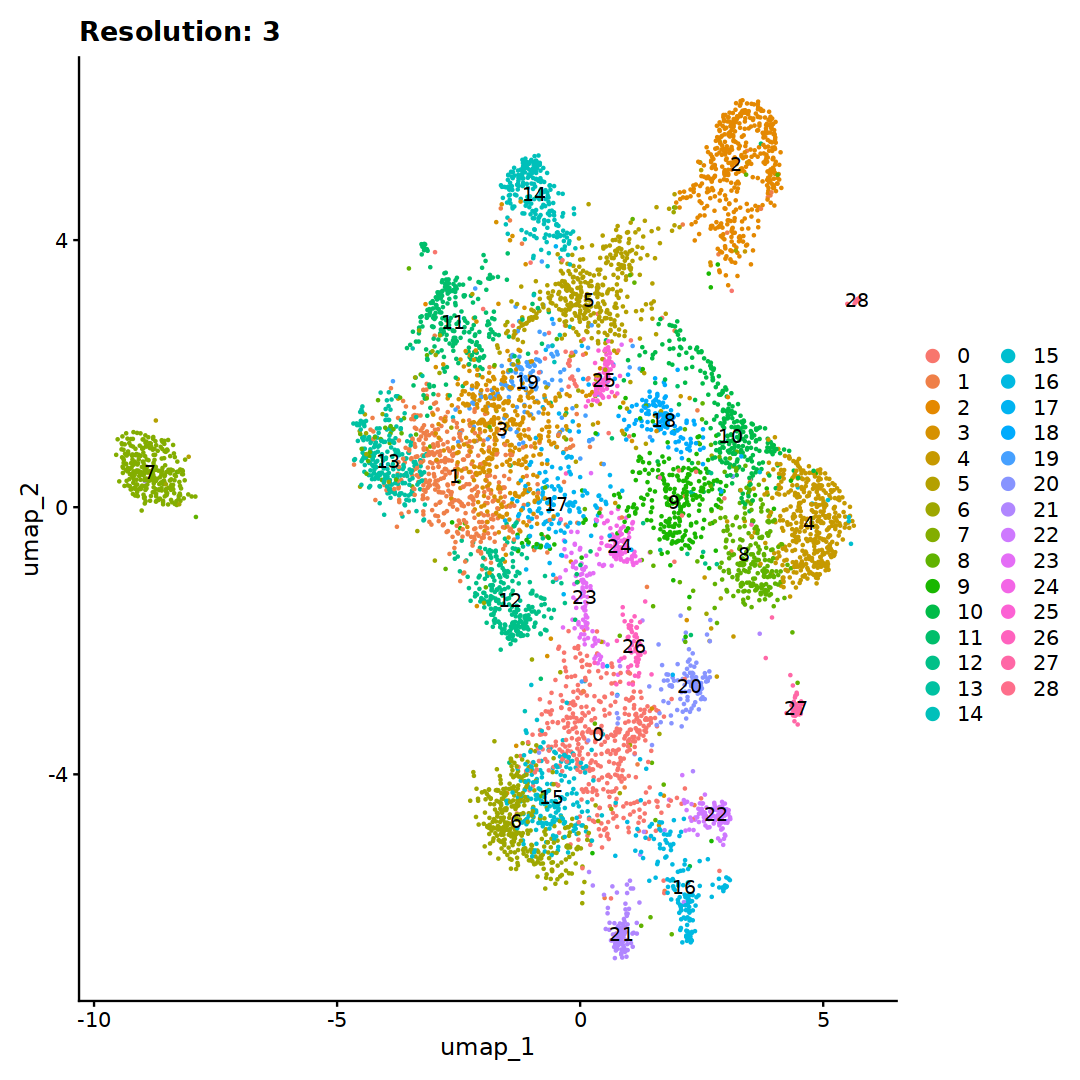

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6508
Number of edges: 290753

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6263
Number of communities: 34
Elapsed time: 1 seconds


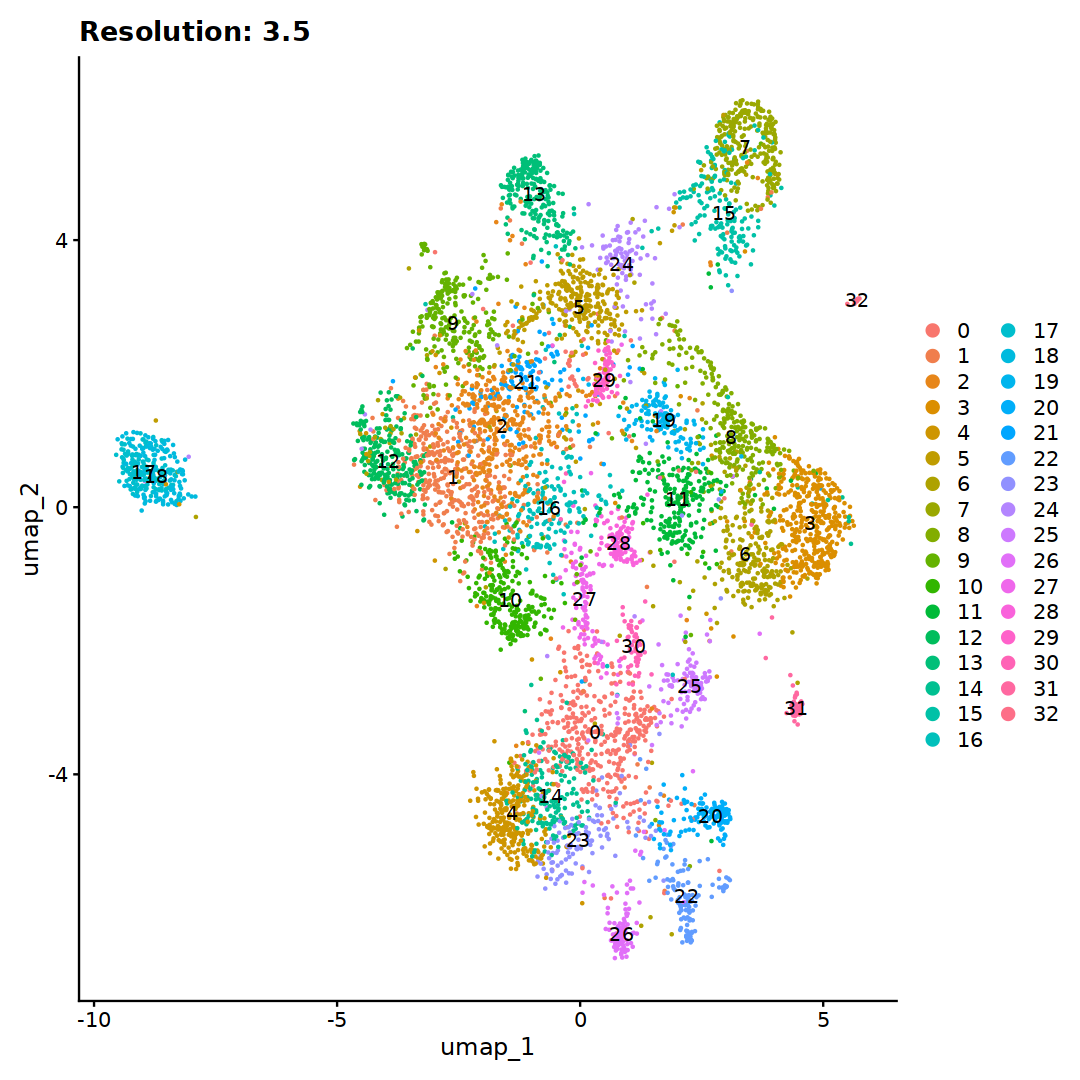

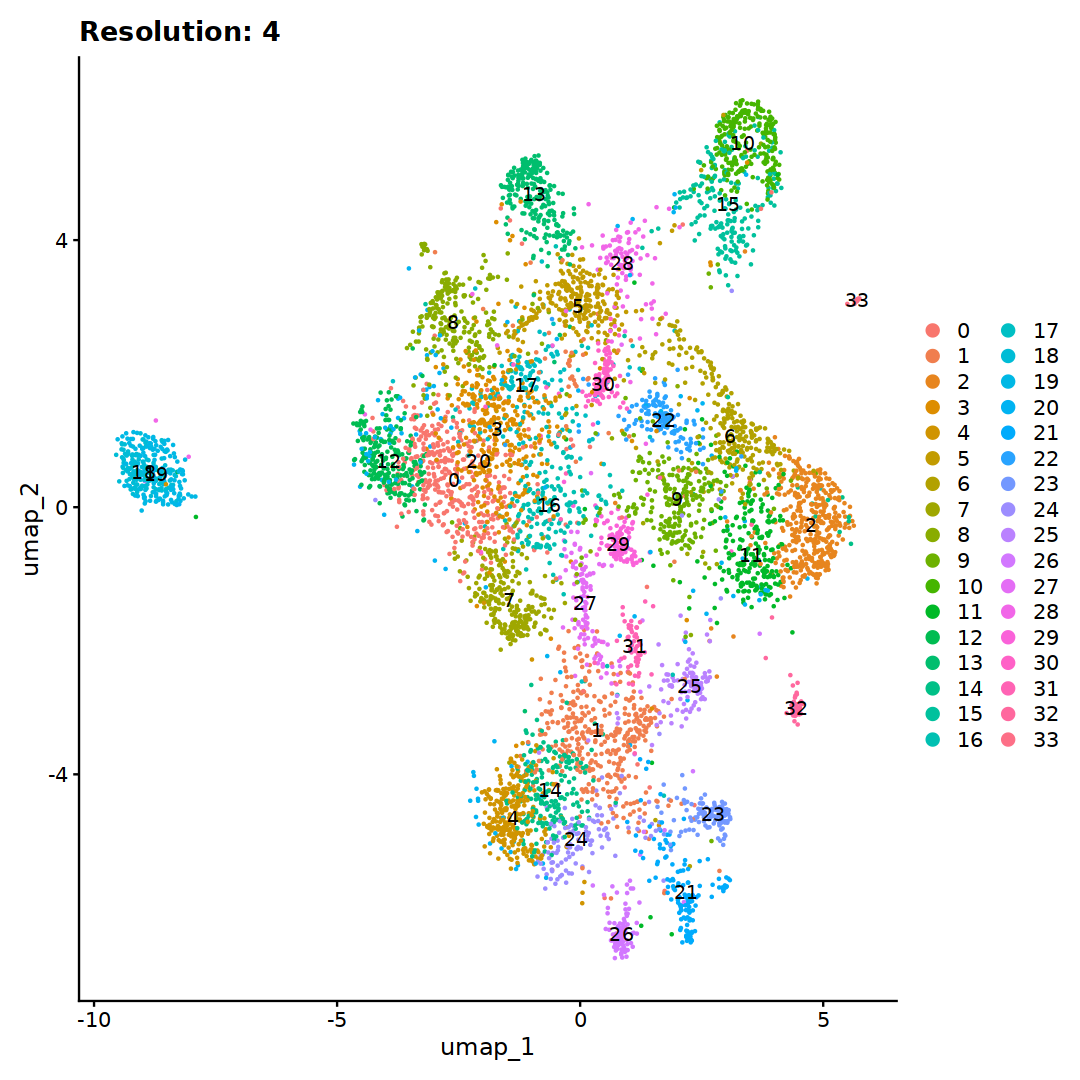

In [17]:
library(Seurat)
library(clustree)
library(dplyr)

# UMAP
Th_GABA <- RunUMAP(Th_GABA, dims = 1:40, verbose = TRUE)

cluster_results <- list()

# re-cluster
for (i in c(0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4)) {
  Th_GABA <- FindClusters(Th_GABA, resolution = i)

  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("GABA_", res_col_name)
  colnames(Th_GABA@meta.data)[colnames(Th_GABA@meta.data) == res_col_name] <- new_col_name

  cluster_results[[paste0("resolution_", i)]] <- Th_GABA

  plot <- DimPlot(Th_GABA, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [18]:
saveRDS(Th_GABA, file = '/data/work/5month_Th/GABA/10_budgerigar_brain_5months_Th_GABA_unannotated.rds')